In [1]:
# Yernar Shambayev, DL-2
# 1. Скачать датасет с фразами симпосонов - https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data
# 2. Обучить word2vec на фразах персонажей
# 3. Визуаилизировать embeddings по самым частотным словам (top 1000)
# 4. Найти самые близкие слова для:
#  homer - marge + bart
#  bart - lisa + school
#  marge - homer + home

import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import re

%matplotlib inline
import matplotlib.pyplot as plt
%pprint

Pretty printing has been turned OFF


In [2]:
# 1. Датасет с фразами симпсонов

df = pd.read_csv('simpsons_script_lines.csv',error_bad_lines=False)

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [3]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [4]:
# 2. Обучить word2vec на фразах персонажей

sentences = [re.findall("[a-zA-Z]+", line) for line in df.dropna(subset=['normalized_text'])['normalized_text'].values]
print(sentences[0:5])

model = Word2Vec(sentences, min_count=1)
print(model)

[['no', 'actually', 'it', 'was', 'a', 'little', 'of', 'both', 'sometimes', 'when', 'a', 'disease', 'is', 'in', 'all', 'the', 'magazines', 'and', 'all', 'the', 'news', 'shows', 'its', 'only', 'natural', 'that', 'you', 'think', 'you', 'have', 'it'], ['wheres', 'mr', 'bergstrom'], ['i', 'dont', 'know', 'although', 'id', 'sure', 'like', 'to', 'talk', 'to', 'him', 'he', 'didnt', 'touch', 'my', 'lesson', 'plan', 'what', 'did', 'he', 'teach', 'you'], ['that', 'life', 'is', 'worth', 'living'], ['the', 'polls', 'will', 'be', 'open', 'from', 'now', 'until', 'the', 'end', 'of', 'recess', 'now', 'just', 'in', 'case', 'any', 'of', 'you', 'have', 'decided', 'to', 'put', 'any', 'thought', 'into', 'this', 'well', 'have', 'our', 'final', 'statements', 'martin']]
Word2Vec(vocab=40281, size=100, alpha=0.025)


/home/taisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


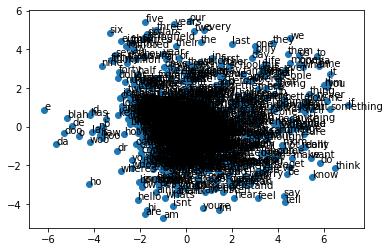

In [5]:
# 3. Визуализировать по самым частотным словам (top 1000)

frequent_words = [w[0] for w in sorted([(w, model.wv.vocab[w].count) for w in model.wv.vocab], key=lambda x: -x[1])[:1000]]
X = model[frequent_words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(frequent_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [6]:
# 4. Найти самые близкие слова для:
#  homer - marge + bart
#  bart - lisa + school
#  marge - homer + home

similar1 = model.wv.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=5)
similar2 = model.wv.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=5)
similar3 = model.wv.most_similar(positive=['marge', 'hom'], negative=['homer'], topn=5)

print(f'homer - marge + bart: {similar1}\n')
print(f'bart - lisa + school: {similar2}\n')
print(f'marge - homer + hom: {similar3}\n')

homer - marge + bart: [('lisa', 0.8298697471618652), ('grampa', 0.7392879724502563), ('milhouse', 0.7203342318534851), ('pjs', 0.7044923305511475), ('maggie', 0.6840050220489502)]

bart - lisa + school: [('house', 0.7843388915061951), ('home', 0.7527203559875488), ('church', 0.7527092695236206), ('once', 0.7525041699409485), ('store', 0.7509922981262207)]

marge - homer + hom: [('huzzah', 0.853594183921814), ('sexless', 0.8366329669952393), ('midler', 0.8347328901290894), ('grovel', 0.8306186199188232), ('lara', 0.8258465528488159)]

